<a href="https://colab.research.google.com/github/Shantanu9326/Data-Science-Portfolio/blob/master/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Car Price Prediction

A Chinese automobile company aspires to enter the US
market by setting up their manufacturing unit there and producing cars
locally to give competition to their US and European counterparts.
They have contacted an automobile consulting company to understand
the factors on which the pricing of cars depends. Specifically, they want to
understand the factors affecting the pricing of cars in the American market,
since those may be very different from the Chinese market. Essentially, the
company wants to know:<br>
• Which variables are significant in predicting the price of a car<br>
• How well those variables describe the price of a car<br>

Based on various market surveys, the consulting firm has gathered a large
dataset of different types of cars across the American market.

Business Goal<br>
It will be used by the management to understand how exactly
the prices vary with the independent variables. They can accordingly
manipulate the design of the cars, the business strategy etc. to meet certain
price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.

##Data Dictionary

1	Car_ID:			Unique id of each observation (Interger)		
2	Symboling: 			Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		
3	carCompany:			Name of car company (Categorical)		
4	fueltype:			Car fuel type i.e gas or diesel (Categorical)		
5	aspiration:			Aspiration used in a car (Categorical)		
6	doornumber:			Number of doors in a car (Categorical)		
7	carbody:			body of car (Categorical)		
8	drivewheel:			type of drive wheel (Categorical)		
9	enginelocation:			Location of car engine (Categorical)		
10	wheelbase:			Weelbase of car (Numeric)		
11	carlength:			Length of car (Numeric)		
12	carwidth:			Width of car (Numeric)		
13	carheight:			height of car (Numeric)		
14	curbweight:			The weight of a car without occupants or baggage. (Numeric)		
15	enginetype:			Type of engine. (Categorical)		
16	cylindernumber:			cylinder placed in the car (Categorical)		
17	enginesize:			Size of car (Numeric)		
18	fuelsystem:			Fuel system of car (Categorical)		
19	boreratio:			Boreratio of car (Numeric)		
20	stroke:			Stroke or volume inside the engine (Numeric)		
21	compressionratio:			compression ratio of car (Numeric)		
22	horsepower:			Horsepower (Numeric)		
23	peakrpm:			car peak rpm (Numeric)		
24	citympg:			Mileage in city (Numeric)		
25	highwaympg:			Mileage on highway (Numeric)		
26	price(Dependent variable):			Price of car (Numeric)		

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

This solution addresses the issue concerning prices of automobiles affected by various attributes which are explained in the above sections.

The dataset for this paper has been obtained from the UCI Machine Learning Repository:https://archive.ics.uci.edu/ml/datasets/Automobile


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# reading the dataset
cars = pd.read_csv("/content/drive/My Drive/app/CarPrice_Assignment.csv")

In [0]:
#Running or Importing .py Files with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [0]:
# head
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase   ...     enginesize  \
0  convertible        rwd          front       88.6   ...            130   
1  convertible        rwd          front       88.6   ...            130   
2    hatchback        rwd          front       94.5   ...            152   
3        sedan        fwd          front       99.8   ...            109   
4        sedan        4wd          front       99.4   ...            136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [0]:
#The second rating corresponds to the degree to which the auto is more risky than its price indicates.
#Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process “symboling”. 
#A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
# symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
cars['symboling'].astype('category').value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [0]:
# aspiration: An (internal combustion) engine property showing 
# whether the oxygen intake is through standard (atmospheric pressure)
# or through turbocharging (pressurised oxygen intake)
cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [0]:
# drivewheel: frontwheel, rarewheel or four-wheel drive 
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

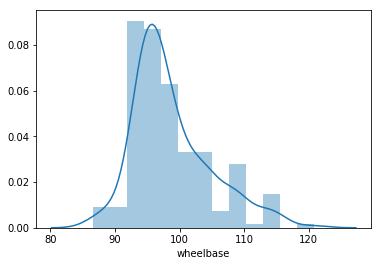

In [0]:
# wheelbase: distance between centre of front and rarewheels
sns.distplot(cars['wheelbase'])
plt.show()

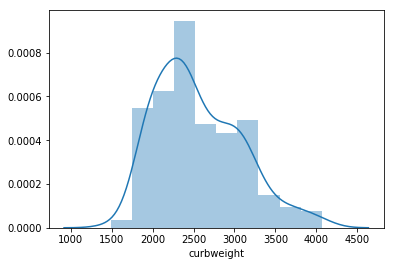

In [0]:
# curbweight: weight of car without occupants or baggage
sns.distplot(cars['curbweight'])
plt.show()

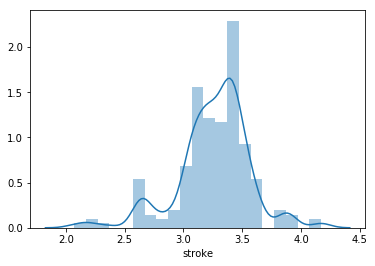

In [0]:
# stroke: volume of the engine (the distance traveled by the 
# piston in each cycle)
sns.distplot(cars['stroke'])
plt.show()

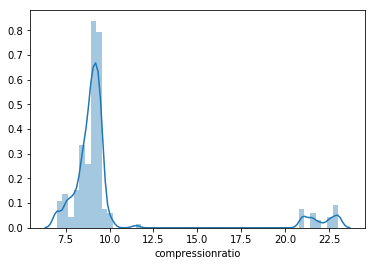

In [0]:
# compression ratio: ration of volume of compression chamber 
# at largest capacity to least capacity
sns.distplot(cars['compressionratio'])
plt.show()

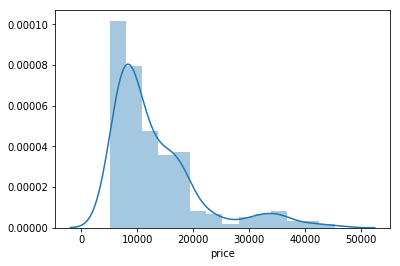

In [0]:
# target variable: price of car
sns.distplot(cars['price'])
plt.show()

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [0]:
# all numeric (float and int) variables in the dataset
cars_numeric = cars.select_dtypes(include=['float64', 'int'])
cars_numeric.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0

Here, although the variable ```symboling``` is numeric (int), we'd rather treat it as categorical since it has only 7 discrete values. Also, we do not want 'car_ID'.

In [0]:
# dropping symboling and car_ID 
cars_numeric = cars_numeric.drop(['symboling', 'car_ID'], axis=1)
cars_numeric.head()

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

Let's now make a pairwise scatter plot and observe linear relationships.

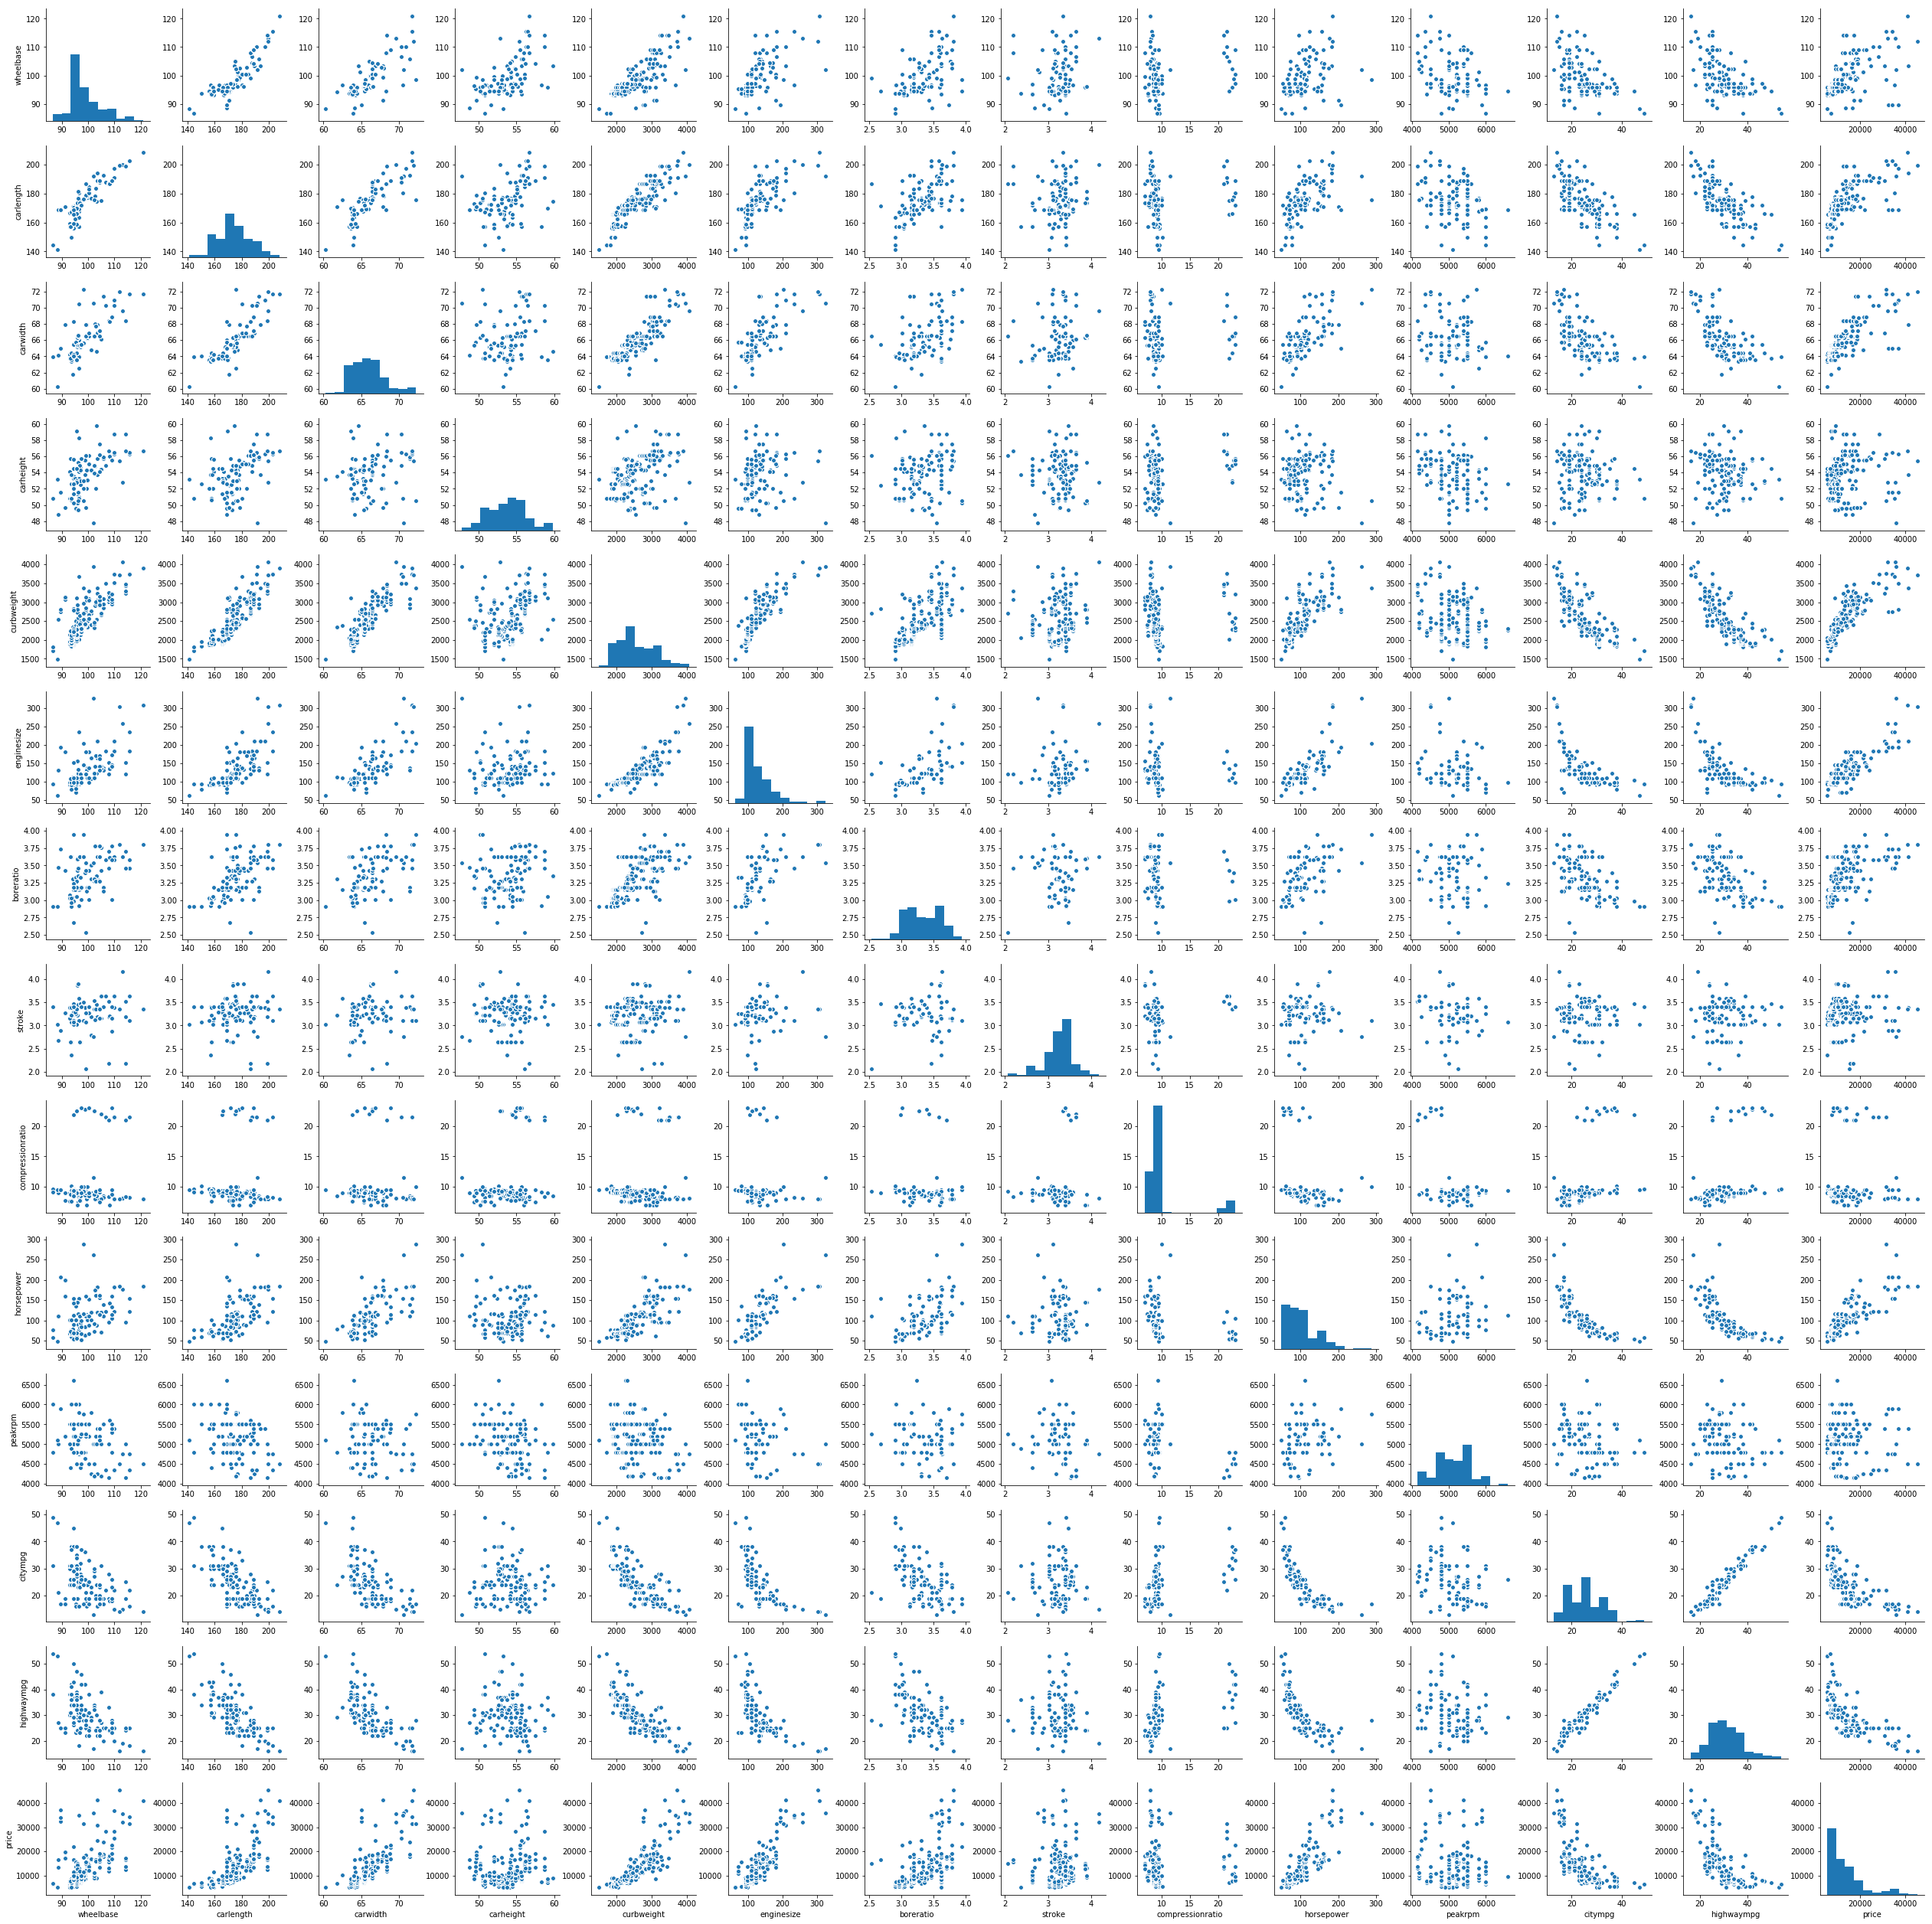

In [0]:
# paiwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric)
plt.show()

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [0]:
# correlation matrix
cor = cars_numeric.corr()
cor

wheelbase  carlength  carwidth  carheight  curbweight  \
wheelbase          1.000000   0.874587  0.795144   0.589435    0.776386   
carlength          0.874587   1.000000  0.841118   0.491029    0.877728   
carwidth           0.795144   0.841118  1.000000   0.279210    0.867032   
carheight          0.589435   0.491029  0.279210   1.000000    0.295572   
curbweight         0.776386   0.877728  0.867032   0.295572    1.000000   
enginesize         0.569329   0.683360  0.735433   0.067149    0.850594   
boreratio          0.488750   0.606454  0.559150   0.171071    0.648480   
stroke             0.160959   0.129533  0.182942  -0.055307    0.168790   
compressionratio   0.249786   0.158414  0.181129   0.261214    0.151362   
horsepower         0.353294   0.552623  0.640732  -0.108802    0.750739   
peakrpm           -0.360469  -0.287242 -0.220012  -0.320411   -0.266243   
citympg           -0.470414  -0.670909 -0.642704  -0.048640   -0.757414   
highwaympg        -0.544082  -0.704662 -0.677218  -0.107358   -0.797465   
price              0.577816   0.682920  0.759325   0.119336    0.835305   

                  enginesize  boreratio    stroke  compressionratio  \
wheelbase           0.569329   0.488750  0.160959          0.249786   
carlength           0.683360   0.606454  0.129533          0.158414   
carwidth            0.735433   0.559150  0.182942          0.181129   
carheight           0.067149   0.171071 -0.055307          0.261214   
curbweight          0.850594   0.648480  0.168790          0.151362   
enginesize          1.000000   0.583774  0.203129          0.028971   
boreratio           0.583774   1.000000 -0.055909          0.005197   
stroke              0.203129  -0.055909  1.000000          0.186110   
compressionratio    0.028971   0.005197  0.186110          1.000000   
horsepower          0.809769   0.573677  0.080940         -0.204326   
peakrpm            -0.244660  -0.254976 -0.067964         -0.435741   
citympg            -0.653658  -0.584532 -0.042145          0.324701   
highwaympg         -0.677470  -0.587012 -0.043931          0.265201   
price               0.874145   0.553173  0.079443          0.067984   

                  horsepower   peakrpm   citympg  highwaympg     price  
wheelbase           0.353294 -0.360469 -0.470414   -0.544082  0.577816  
carlength           0.552623 -0.287242 -0.670909   -0.704662  0.682920  
carwidth            0.640732 -0.220012 -0.642704   -0.677218  0.759325  
carheight          -0.108802 -0.320411 -0.048640   -0.107358  0.119336  
curbweight          0.750739 -0.266243 -0.757414   -0.797465  0.835305  
enginesize          0.809769 -0.244660 -0.653658   -0.677470  0.874145  
boreratio           0.573677 -0.254976 -0.584532   -0.587012  0.553173  
stroke              0.080940 -0.067964 -0.042145   -0.043931  0.079443  
compressionratio   -0.204326 -0.435741  0.324701    0.265201  0.067984  
horsepower          1.000000  0.131073 -0.801456   -0.770544  0.808139  
peakrpm             0.131073  1.000000 -0.113544   -0.054275 -0.085267  
citympg            -0.801456 -0.113544  1.000000    0.971337 -0.685751  
highwaympg         -0.770544 -0.054275  0.971337    1.000000 -0.697599  
price               0.808139 -0.085267 -0.685751   -0.697599  1.000000

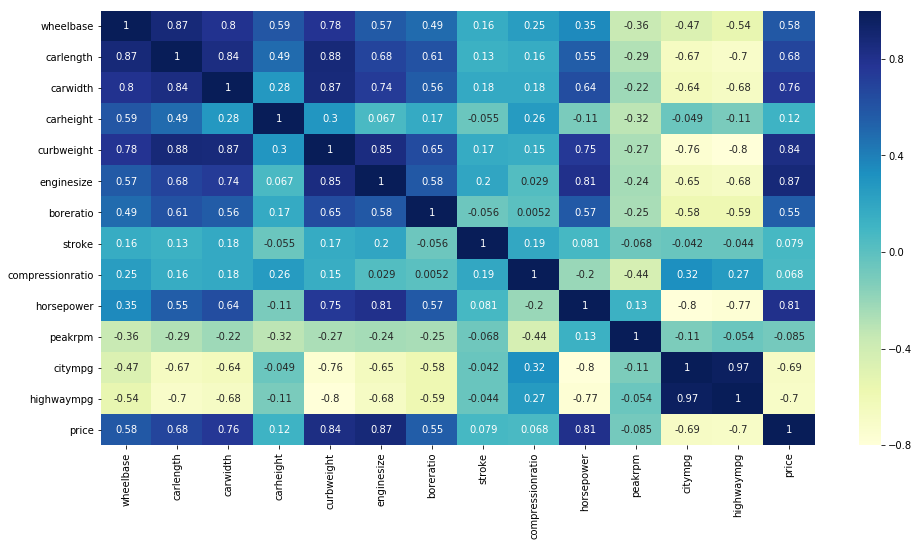

In [0]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of price with independent variables:
- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

- Price is negatively correlated to ```citympg``` and ```highwaympg``` (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:
- Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated 


Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

In [0]:
# summarising number of missing values in each column
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except ```symboling```, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it *can* be used in the model as a numeric variable also. 



In [0]:
# variable formats
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [0]:
# converting symboling to categorical
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null object
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm     

Netx, we need to extract the company name from the column ```CarName```. 

In [0]:
# CarName: first few entries
cars['CarName'][:30]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
5                      audi fox
6                    audi 100ls
7                     audi 5000
8                     audi 4000
9           audi 5000s (diesel)
10                     bmw 320i
11                     bmw 320i
12                       bmw x1
13                       bmw x3
14                       bmw z4
15                       bmw x4
16                       bmw x5
17                       bmw x3
18             chevrolet impala
19        chevrolet monte carlo
20          chevrolet vega 2300
21                dodge rampage
22          dodge challenger se
23                   dodge d200
24            dodge monaco (sw)
25           dodge colt hardtop
26              dodge colt (sw)
27         dodge coronet custom
28            dodge dart custom
29    dodge coronet custom (sw)
Name: CarName, dtype: object

Notice that the carname is what occurs before a space, e.g. alfa-romero, audi, chevrolet, dodge, bmx etc.

Thus, we need to simply extract the string before a space. There are multiple ways to do that.




In [0]:
# Extracting carname

# Method 1: str.split() by space
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:30]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object

In [0]:
# Method 2: Use regular expressions
import re

# regex: any alphanumeric sequence before a space, may contain a hyphen
p = re.compile(r'\w+-?\w+')
carnames = cars['CarName'].apply(lambda x: re.findall(p, x)[0])
print(carnames)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
          ...     
175         toyota
176         toyota
177         toyota
178         toyota
179         toyota
180         toyota
181        toyouta
182      vokswagen
183     volkswagen
184     volkswagen
185     volkswagen
186     volkswagen
187     volkswagen
188     volkswagen
189             vw
190             vw
191     volkswagen
192     volkswagen
193     volkswagen
194          volvo
195          volvo
196         

Let's create a new column to store the compnay name and check whether it looks okay.

In [0]:
# New column car_company
cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p, x)[0])
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase     ...       fuelsystem  \
0  convertible        rwd          front       88.6     ...             mpfi   
1  convertible        rwd          front       88.6     ...             mpfi   
2    hatchback        rwd          front       94.5     ...             mpfi   
3        sedan        fwd          front       99.8     ...             mpfi   
4        sedan        4wd          front       99.4     ...             mpfi   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \
0       3.47    2.68               9.0        111    5000       21         27   
1       3.47    2.68               9.0        111    5000       21         27   
2       2.68    3.47               9.0        154    5000       19         26   
3       3.19    3.40              10.0        102    5500       24         30   
4       3.19    3.40               8.0        115    5500       18         22   

     price  car_company  
0  13495.0  alfa-romero  
1  16500.0  alfa-romero  
2  16500.0  alfa-romero  
3  13950.0         audi  
4  17450.0         audi  

[5 rows x 27 columns]

In [0]:
# look at all values 
cars['car_company'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
maxda           2
renault         2
mercury         1
porcshce        1
toyouta         1
vokswagen       1
Nissan          1
Name: car_company, dtype: int64

Notice that **some car-company names are misspelled** - vw and vokswagen should be volkswagen, porcshce should be porsche, toyouta should be toyota, Nissan should be nissan, maxda should be mazda etc.

This is a data quality issue, let's solve it.

In [0]:
# replacing misspelled car_company names

# volkswagen
cars.loc[(cars['car_company'] == "vw") | 
         (cars['car_company'] == "vokswagen")
         , 'car_company'] = 'volkswagen'

# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

In [0]:
cars['car_company'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: car_company, dtype: int64

The ```car_company``` variable looks okay now. Let's now drop the car name variable.

In [0]:
# drop carname variable
cars = cars.drop('CarName', axis=1)
cars.head()

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1          3      gas        std        two  convertible        rwd   
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength     ...       fuelsystem  boreratio  \
0          front       88.6      168.8     ...             mpfi       3.47   
1          front       88.6      168.8     ...             mpfi       3.47   
2          front       94.5      171.2     ...             mpfi       2.68   
3          front       99.8      176.6     ...             mpfi       3.19   
4          front       99.4      176.6     ...             mpfi       3.19   

   stroke compressionratio horsepower  peakrpm citympg  highwaympg    price  \
0    2.68              9.0        111     5000      21          27  13495.0   
1    2.68              9.0        111     5000      21          27  16500.0   
2    3.47              9.0        154     5000      19          26  16500.0   
3    3.40             10.0        102     5500      24          30  13950.0   
4    3.40              8.0        115     5500      18          22  17450.0   

   car_company  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3         audi  
4         audi  

[5 rows x 26 columns]

In [0]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [0]:
# outliers
cars.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [0]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [0]:
cars.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'car_company'],
      dtype='object')

In [0]:
# split into X and y
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]

y = cars['price']

X

symboling fueltype aspiration doornumber      carbody drivewheel  \
0            3      gas        std        two  convertible        rwd   
1            3      gas        std        two  convertible        rwd   
2            1      gas        std        two    hatchback        rwd   
3            2      gas        std       four        sedan        fwd   
4            2      gas        std       four        sedan        4wd   
5            2      gas        std        two        sedan        fwd   
6            1      gas        std       four        sedan        fwd   
7            1      gas        std       four        wagon        fwd   
8            1      gas      turbo       four        sedan        fwd   
9            0      gas      turbo        two    hatchback        4wd   
10           2      gas        std        two        sedan        rwd   
11           0      gas        std       four        sedan        rwd   
12           0      gas        std        two        sedan        rwd   
13           0      gas        std       four        sedan        rwd   
14           1      gas        std       four        sedan        rwd   
15           0      gas        std       four        sedan        rwd   
16           0      gas        std        two        sedan        rwd   
17           0      gas        std       four        sedan        rwd   
18           2      gas        std        two    hatchback        fwd   
19           1      gas        std        two    hatchback        fwd   
20           0      gas        std       four        sedan        fwd   
21           1      gas        std        two    hatchback        fwd   
22           1      gas        std        two    hatchback        fwd   
23           1      gas      turbo        two    hatchback        fwd   
24           1      gas        std       four    hatchback        fwd   
25           1      gas        std       four        sedan        fwd   
26           1      gas        std       four        sedan        fwd   
27           1      gas      turbo        two        sedan        fwd   
28          -1      gas        std       four        wagon        fwd   
29           3      gas      turbo        two    hatchback        fwd   
..         ...      ...        ...        ...          ...        ...   
175         -1      gas        std       four    hatchback        fwd   
176         -1      gas        std       four        sedan        fwd   
177         -1      gas        std       four    hatchback        fwd   
178          3      gas        std        two    hatchback        rwd   
179          3      gas        std        two    hatchback        rwd   
180         -1      gas        std       four        sedan        rwd   
181         -1      gas        std       four        wagon        rwd   
182          2   diesel        std        two        sedan        fwd   
183          2      gas        std        two        sedan        fwd   
184          2   diesel        std       four        sedan        fwd   
185          2      gas        std       four        sedan        fwd   
186          2      gas        std       four        sedan        fwd   
187          2   diesel      turbo       four        sedan        fwd   
188          2      gas        std       four        sedan        fwd   
189          3      gas        std        two  convertible        fwd   
190          3      gas        std        two    hatchback        fwd   
191          0      gas        std       four        sedan        fwd   
192          0   diesel      turbo       four        sedan        fwd   
193          0      gas        std       four        wagon        fwd   
194         -2      gas        std       four        sedan        rwd   
195         -1      gas        std       four        wagon        rwd   
196         -2      gas        std       four        sedan        rwd   
197         -1      gas        std       four        wagon     

In [0]:
y

0      13495.000
1      16500.000
2      16500.000
3      13950.000
4      17450.000
5      15250.000
6      17710.000
7      18920.000
8      23875.000
9      17859.167
10     16430.000
11     16925.000
12     20970.000
13     21105.000
14     24565.000
15     30760.000
16     41315.000
17     36880.000
18      5151.000
19      6295.000
20      6575.000
21      5572.000
22      6377.000
23      7957.000
24      6229.000
25      6692.000
26      7609.000
27      8558.000
28      8921.000
29     12964.000
         ...    
175     9988.000
176    10898.000
177    11248.000
178    16558.000
179    15998.000
180    15690.000
181    15750.000
182     7775.000
183     7975.000
184     7995.000
185     8195.000
186     8495.000
187     9495.000
188     9995.000
189    11595.000
190     9980.000
191    13295.000
192    13845.000
193    12290.000
194    12940.000
195    13415.000
196    15985.000
197    16515.000
198    18420.000
199    18950.000
200    16845.000
201    19045.000
202    21485.0

In [0]:
# creating dummy variables for categorical variables

# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()


fueltype aspiration doornumber      carbody drivewheel enginelocation  \
0      gas        std        two  convertible        rwd          front   
1      gas        std        two  convertible        rwd          front   
2      gas        std        two    hatchback        rwd          front   
3      gas        std       four        sedan        fwd          front   
4      gas        std       four        sedan        4wd          front   

  enginetype cylindernumber fuelsystem  car_company  
0       dohc           four       mpfi  alfa-romero  
1       dohc           four       mpfi  alfa-romero  
2       ohcv            six       mpfi  alfa-romero  
3        ohc           four       mpfi         audi  
4        ohc           five       mpfi         audi

In [0]:
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()


fueltype_gas  aspiration_turbo  doornumber_two  carbody_hardtop  \
0             1                 0               1                0   
1             1                 0               1                0   
2             1                 0               1                0   
3             1                 0               0                0   
4             1                 0               0                0   

   carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_fwd  \
0                  0              0              0               0   
1                  0              0              0               0   
2                  1              0              0               0   
3                  0              1              0               1   
4                  0              1              0               0   

   drivewheel_rwd  enginelocation_rear        ...          car_company_nissan  \
0               1                    0        ...                           0   
1               1                    0        ...                           0   
2               1                    0        ...                           0   
3               0                    0        ...                           0   
4               0                    0        ...                           0   

   car_company_peugeot  car_company_plymouth  car_company_porsche  \
0                    0                     0                    0   
1                    0                     0                    0   
2                    0                     0                    0   
3                    0                     0                    0   
4                    0                     0                    0   

   car_company_renault  car_company_saab  car_company_subaru  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   
3                    0                 0                   0   
4                    0                 0                   0   

   car_company_toyota  car_company_volkswagen  car_company_volvo  
0                   0                       0                  0  
1                   0                       0                  0  
2                   0                       0                  0  
3                   0                       0                  0  
4                   0                       0                  0  

[5 rows x 50 columns]

In [0]:
# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)

In [0]:
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

In [0]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',
       'car_company_dodge', 'car_company_honda', 'car_company_isuzu',


In [0]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)
print(f'Training Sample:{X_train.shape}')
print(f'Testing Sample:{X_test.shape}')

Training Sample:(143, 64)
Testing Sample:(62, 64)


## 3. Model Building and Evaluation

In [0]:
# Building the first model with all the features

# instantiate
lm = LinearRegression()

# fit
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
# print coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-8.88491018e+01  1.77549046e+03 -1.26929286e+03  1.67683175e+03
 -1.37646396e+03  2.40063906e+03  1.14076211e+04 -4.82356153e+03
 -1.03681060e+03 -3.23776023e+03 -1.19305294e+03  1.32029369e+03
 -3.38378477e+02  8.55769643e+02 -1.47763552e+03  1.12951471e+03
 -2.28491463e+02 -6.80944003e+02 -1.81645529e+03 -1.56484128e+03
 -8.00983441e+02 -6.12168673e+01  4.58912940e+02  1.18226718e+03
  5.99875928e+02 -5.52712836e+01  1.68773862e+01  8.62314452e+02
 -2.42847498e+02  1.98304843e+03  2.17426720e+03  6.62255803e+03
  1.38360068e+03  1.78823723e+03 -8.98532612e+02  1.98304843e+03
  3.92818842e+02 -2.12120094e+02  1.47763552e+03 -1.13686838e-12
 -2.90509951e+02 -1.94215621e+02  1.13686838e-12  4.58023990e+02
  2.38052709e+03  3.45638010e+02 -2.27063542e+02 -8.08260507e+02
 -6.07441645e+02  1.14919263e+01 -5.78833865e+02  2.44277449e+02
 -6.25277607e-13 -1.12303366e+03  2.74918344e+02 -6.10475435e+02
 -7.39242780e+02  1.47224025e+03 -3.86979277e+01  1.37856901e+03
  3.51815084e+02  2.16577

In [0]:
# predict 
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))

0.8419245986854565


Not bad, we are getting approx. 83% r-squared with all the variables. Let's see how much we can get with lesser features.

#### Model Building Using RFE

Let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features, and then use the ```statsmodels``` library to build models using the shortlisted features (this is also because sklearn doesn't have adjusted r-squared, statsmodels has).

In [0]:
# RFE with 15 features
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe_15 = RFE(lm, 15)

# fit with 15 features
rfe_15.fit(X_train, y_train)

# Printing the boolean results
print(rfe_15.support_)           
print(rfe_15.ranking_)  

[False False False  True False  True  True  True  True False False False
 False False False False False False False False False False False  True
 False False False False False  True  True  True False  True  True  True
 False False False False False False False False  True False False False
 False False False False False False False  True False  True False False
 False False False False]
[42  4  5  1  7  1  1  1  1  9 28 13 31 22 11  2 35 21  6 19 20 43 23  1
 27 44 46 18 32  1  1  1 26  1  1  1 34 29 10 49 17 24 48 33  1 36 30 14
 16 47 25 39 50  3 38  1 15  1 45  8 37 40 41 12]


In [0]:
# making predictions using rfe model
y_pred = rfe_15.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.8941491916479425


In [0]:
# RFE with 6 features
from sklearn.feature_selection import RFE

# RFE with 6 features
lm = LinearRegression()
rfe_6 = RFE(lm, 6)

# fit with 6 features
rfe_6.fit(X_train, y_train)

# predict
y_pred = rfe_6.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.8851422877312571


Note that RFE with 6 features is giving about 88% r-squared, compared to 89% with 15 features. 
Should we then choose more features for slightly better performance?

A better metric to look at is adjusted r-squared, which penalises a model for having more features, and thus weights both the goodness of fit and model complexity. Let's use statsmodels library for this.


#### Model Building and Evaluation 

In [0]:
# import statsmodels
import statsmodels.api as sm  

# subset the features selected by rfe_15
col_15 = X_train.columns[rfe_15.support_]

# subsetting training data for 15 selected columns
X_train_rfe_15 = X_train[col_15]

# add a constant to the model
X_train_rfe_15 = sm.add_constant(X_train_rfe_15)
X_train_rfe_15.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


const  carwidth  curbweight  enginesize  boreratio    stroke  \
122    1.0 -0.984972   -0.701886   -0.695874  -1.331531 -0.081241   
125    1.0  1.117866    0.428245    0.579974   2.258638 -0.464834   
166    1.0 -0.891512   -0.492032   -0.695874  -0.332206 -0.560733   
1      1.0 -0.844782   -0.014566    0.074449   0.519071 -1.839377   
199    1.0  0.603839    1.157921    0.074449   1.074252 -0.336970   

     enginelocation_rear  enginetype_rotor  cylindernumber_five  \
122            -0.121867         -0.141069             -0.23812   
125            -0.121867         -0.141069             -0.23812   
166            -0.121867         -0.141069             -0.23812   
1              -0.121867         -0.141069             -0.23812   
199            -0.121867         -0.141069             -0.23812   

     cylindernumber_four  cylindernumber_three  cylindernumber_twelve  \
122             0.537874             -0.070014              -0.070014   
125             0.537874             -0.070014              -0.070014   
166             0.537874             -0.070014              -0.070014   
1               0.537874             -0.070014              -0.070014   
199             0.537874             -0.070014              -0.070014   

     cylindernumber_two  car_company_bmw  car_company_peugeot  \
122           -0.141069        -0.201517             -0.23812   
125           -0.141069        -0.201517             -0.23812   
166           -0.141069        -0.201517             -0.23812   
1             -0.141069        -0.201517             -0.23812   
199           -0.141069        -0.201517             -0.23812   

     car_company_porsche  
122            -0.158114  
125             6.324555  
166            -0.158114  
1              -0.158114  
199            -0.158114

In [0]:
# fitting the model with 15 variables
lm_15 = sm.OLS(y_train, X_train_rfe_15).fit()   
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Tue, 08 Jan 2019   Prob (F-statistic):           1.03e-70
Time:                        04:00:05   Log-Likelihood:                -1283.6
No. Observations:                 143   AIC:                             2597.
Df Residuals:                     128   BIC:                             2642.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.347e+

Note that the model with 15 variables gives about 93.9% r-squared, though that is on training data. The adjusted r-squared is 93.3.

In [0]:
# making predictions using rfe_15 sm model
X_test_rfe_15 = X_test[col_15]


# # Adding a constant variable 
X_test_rfe_15 = sm.add_constant(X_test_rfe_15, has_constant='add')
X_test_rfe_15.info()


# # Making predictions
y_pred = lm_15.predict(X_test_rfe_15)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 16 columns):
const                    62 non-null float64
carwidth                 62 non-null float64
curbweight               62 non-null float64
enginesize               62 non-null float64
boreratio                62 non-null float64
stroke                   62 non-null float64
enginelocation_rear      62 non-null float64
enginetype_rotor         62 non-null float64
cylindernumber_five      62 non-null float64
cylindernumber_four      62 non-null float64
cylindernumber_three     62 non-null float64
cylindernumber_twelve    62 non-null float64
cylindernumber_two       62 non-null float64
car_company_bmw          62 non-null float64
car_company_peugeot      62 non-null float64
car_company_porsche      62 non-null float64
dtypes: float64(16)
memory usage: 8.2 KB


In [0]:
# r-squared
r2_score(y_test, y_pred)

0.8941491916479423

Thus, the test r-squared of model with 15 features is about 89.4%, while training is about 93%. Let's compare the same for the model with 6 features.

In [0]:
# subset the features selected by rfe_6
col_6 = X_train.columns[rfe_6.support_]

# subsetting training data for 6 selected columns
X_train_rfe_6 = X_train[col_6]

# add a constant to the model
X_train_rfe_6 = sm.add_constant(X_train_rfe_6)


# fitting the model with 6 variables
lm_6 = sm.OLS(y_train, X_train_rfe_6).fit()   
print(lm_6.summary())


# making predictions using rfe_6 sm model
X_test_rfe_6 = X_test[col_6]


# Adding a constant  
X_test_rfe_6 = sm.add_constant(X_test_rfe_6, has_constant='add')
X_test_rfe_6.info()


# # Making predictions
y_pred = lm_6.predict(X_test_rfe_6)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     184.8
Date:                Tue, 08 Jan 2019   Prob (F-statistic):           7.79e-63
Time:                        04:00:43   Log-Likelihood:                -1325.8
No. Observations:                 143   AIC:                             2666.
Df Residuals:                     136   BIC:                             2686.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.339e+04    

In [0]:
# r2_score for 6 variables
r2_score(y_test, y_pred)

0.8851422877312569

Thus, for the model with 6 variables, the r-squared on training and test data is about 89% and 88.5% respectively. The adjusted r-squared is about 88.6%.

### Choosing the optimal number of features

Now, we have seen that the adjusted r-squared varies from about 93.3 to 88 as we go from 15 to 6 features, one way to choose the optimal number of features is to make a plot between n_features and adjusted r-squared, and then choose the value of n_features.

In [0]:
n_features_list = list(range(4, 20))
adjusted_r2 = []
r2 = []
test_r2 = []

for n_features in range(4, 20):

    # RFE with n features
    lm = LinearRegression()

    # specify number of features
    rfe_n = RFE(lm, n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # subset the features selected by rfe_6
    col_n = X_train.columns[rfe_n.support_]

    # subsetting training data for 6 selected columns
    X_train_rfe_n = X_train[col_n]

    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    # fitting the model with 6 variables
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)
    
    
    # making predictions using rfe_15 sm model
    X_test_rfe_n = X_test[col_n]


    # # Adding a constant variable 
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')



    # # Making predictions
    y_pred = lm_n.predict(X_test_rfe_n)
    
    test_r2.append(r2_score(y_test, y_pred))


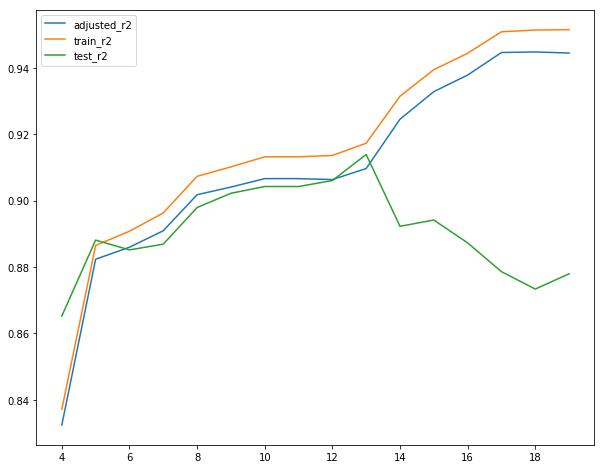

In [0]:
# plotting adjusted_r2 against n_features
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

Based on the plot, we can choose the number of features considering the r2_score we are looking for. Note that there are a few caveats in this approach, and there are more sopisticated techniques to choose the optimal number of features:

- Cross-validation: In this case, we have considered only one train-test split of the dataset; the values of r-squared and adjusted r-squared will vary with train-test split. Thus, cross-validation is a more commonly used technique (you divide the data into multiple train-test splits into 'folds', and then compute average metrics such as r-squared across the 'folds'

- The values of r-squared and adjusted r-squared are computed based on the training set, though we must *always look at metrics computed on the test set*. For e.g. in this case, the test r2 actually goes down with increasing n - this phenomenon is called 'overfitting', where the performance on training set is good because the model has in some way 'memorised' the dataset, and thus the performance on test set is worse.

Thus, we can choose anything between 4 and 12 features, since beyond 12, the test r2 goes down; and at lesser than 4, the r2_score is too less.

In fact, the test_r2 score doesn't increase much anyway from n=6 to n=12. It is thus wiser to choose a simpler model, and so let's choose n=6.


### Final Model

Let's now build the final model with 6 features.

In [0]:
# RFE with n features
lm = LinearRegression()

n_features = 6

# specify number of features
rfe_n = RFE(lm, n_features)

# fit with n features
rfe_n.fit(X_train, y_train)

# subset the features selected by rfe_6
col_n = X_train.columns[rfe_n.support_]

# subsetting training data for 6 selected columns
X_train_rfe_n = X_train[col_n]

# add a constant to the model
X_train_rfe_n = sm.add_constant(X_train_rfe_n)


# fitting the model with 6 variables
lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
adjusted_r2.append(lm_n.rsquared_adj)
r2.append(lm_n.rsquared)


# making predictions using rfe_15 sm model
X_test_rfe_n = X_test[col_n]


# # Adding a constant variable 
X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')



# # Making predictions
y_pred = lm_n.predict(X_test_rfe_n)

test_r2.append(r2_score(y_test, y_pred))

In [0]:
# summary
lm_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     184.8
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           7.79e-63
Time:                        09:39:24   Log-Likelihood:                -1325.8
No. Observations:                 143   AIC:                             2666.
Df Residuals:                     136   BIC:                             2686.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.339e+04    221.912     60.350      0.000     1.3e+04    1.38e+04
carwidth             2022.5954    467.095      4.330      0.000    1098.886    2946.305
curbweight           2280.5711    582.682      3.914      0.000    1128.283    3432.860
enginesize           2455.4132    470.374      5.220      0.000    1525.219    3385.607
enginelocation_rear  1526.3407    406.639      3.754      0.000     722.187    2330.495
car_company_bmw      1755.2549    222.194      7.900      0.000    1315.853    2194.657
car_company_porsche   707.8462    306.321      2.311      0.022     102.077    1313.615
==============================================================================
Omnibus:                        8.829   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.273
Skew:                           0.478   Prob(JB):                      0.00969
Kurtosis:                       3.801   Cond. No.                         5.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
# results 
r2_score(y_test, y_pred)

0.88514228773125714

### Final Model Evaluation

Let's now evaluate the model in terms of its assumptions. We should test that:
- The error terms are normally distributed with mean approximately 0
- There is little correlation between the predictors
- Homoscedasticity, i.e. the 'spread' or 'variance' of the error term (y_true-y_pred) is constant

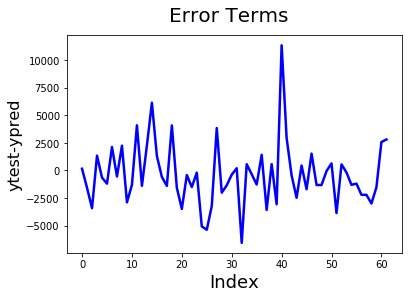

In [0]:
# Error terms
c = [i for i in range(len(y_pred))]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

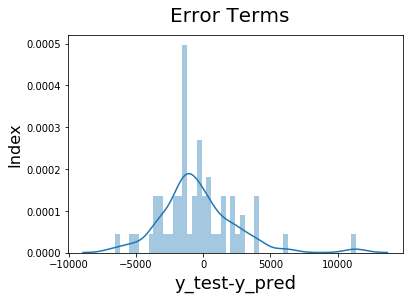

In [0]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

In [0]:
# mean
np.mean(y_test-y_pred)


-382.736324502765

Now it may look like that the mean is not 0, though compared to the scale of 'price', -380 is not such a big number (see distribution below).

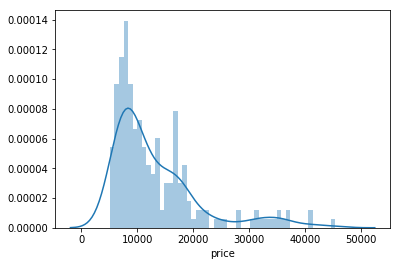

In [0]:
sns.distplot(cars['price'],bins=50)
plt.show()

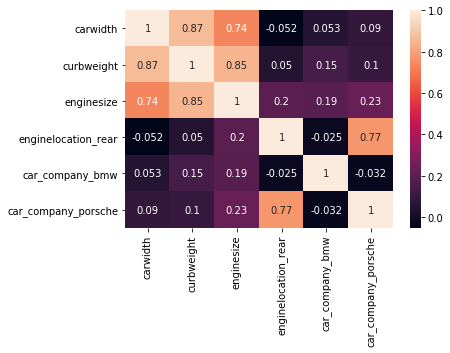

In [0]:
# multicollinearity
predictors = ['carwidth', 'curbweight', 'enginesize', 
             'enginelocation_rear', 'car_company_bmw', 'car_company_porsche']

cors = X.loc[:, list(predictors)].corr()
sns.heatmap(cors, annot=True)
plt.show()

Though this is the most simple model we've built till now, the final predictors still seem to have high correlations. One can go ahead and remove some of these features, though that will affect the adjusted-r2 score significantly (you should try doing that). 


Thus, for now, the final model consists of the 6 variables mentioned above.